# House Sales in King County, USA

In this project, we analyze housing data to predict house sale prices using machine learning techniques. We perform data cleaning, exploratory data analysis, feature selection, and build predictive models to help stakeholders understand price drivers and make data-driven investment decisions.

# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01).

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [112]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [14]:
import requests

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
filename = "housing.csv"

response = requests.get(url)
if response.status_code == 200:
    with open(filename, "wb") as f:
        f.write(response.content)
    print(f"Downloaded {filename}")
else:
    print("Failed to download")

Downloaded housing.csv


In [18]:
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [22]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [26]:
df.drop(columns = ["Unnamed: 0", "id"], inplace = True, axis = 1)

In [30]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

There are 13 missing values in column bedrooms and 10 missing values in column bathrooms. Lets replace the missing values with frequently occuring value in that column.

In [50]:
bedroom_max_freq = df["bedrooms"].value_counts().idxmax()
print(f"Most of the houses have {bedroom_max_freq} bedroom")

Most of the houses have 3.0 bedroom


In [52]:
bathroom_max_freq = df["bathrooms"].value_counts().idxmax()
print(f"Most of the houses have {bathroom_max_freq} bathrooms")

Most of the houses have 2.5 bathrooms


In [58]:
df["bedrooms"].replace(np.nan, bedroom_max_freq, inplace = True)
df["bathrooms"].replace(np.nan, bathroom_max_freq, inplace = True)
df.isnull().sum()

/var/folders/tv/65fm8gl968v8bvb1dnkdxjsw0000gn/T/ipykernel_39500/3793428073.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bedrooms"].replace(np.nan, bedroom_max_freq, inplace = True)
/var/folders/tv/65fm8gl968v8bvb1dnkdxjsw0000gn/T/ipykernel_39500/3793428073.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Exploratory Data Analysis

Lets determine whether houses with a waterfront view or without a waterfront view have more price outliers.

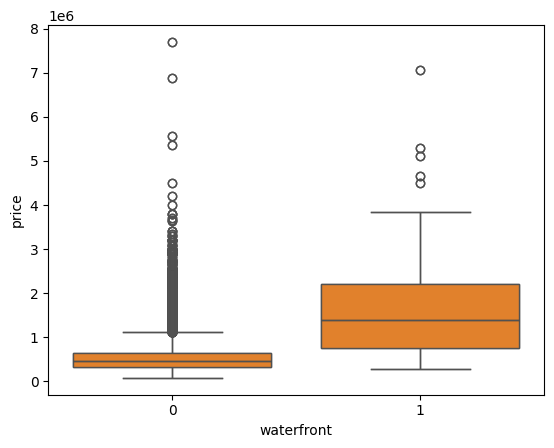

In [68]:
sns.boxplot(x = "waterfront", y = "price", data = df)
plt.show()

Houses without the waterfront has more price outliers

Let's see if sqft_above is positively or negeatively correlated to price

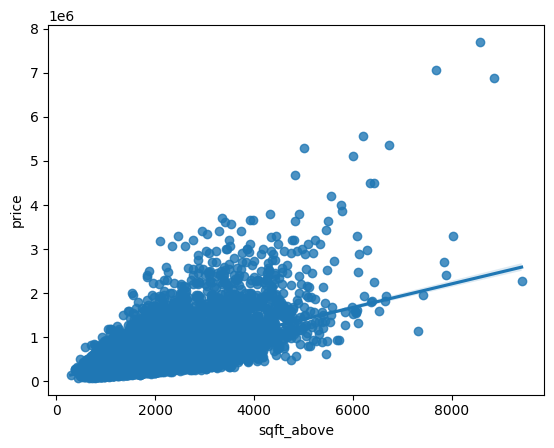

In [73]:
sns.regplot(x = "sqft_above", y = "price", data = df)
plt.show()

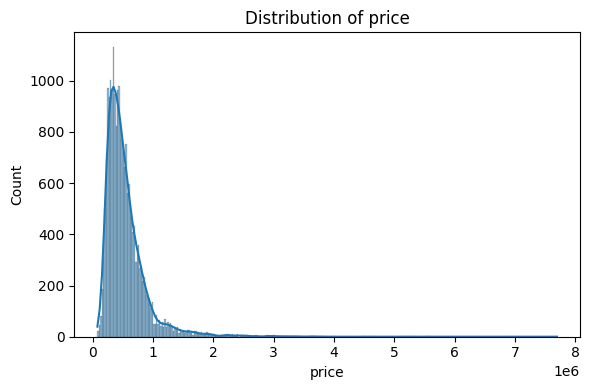

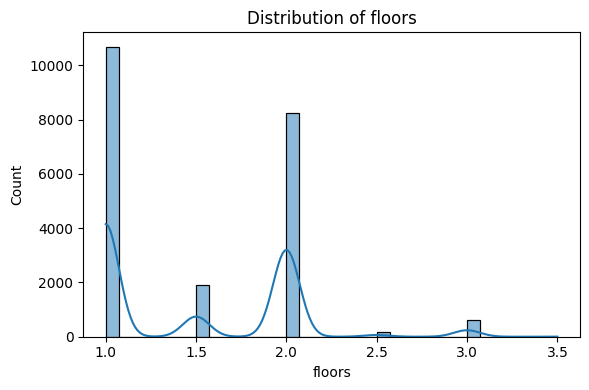

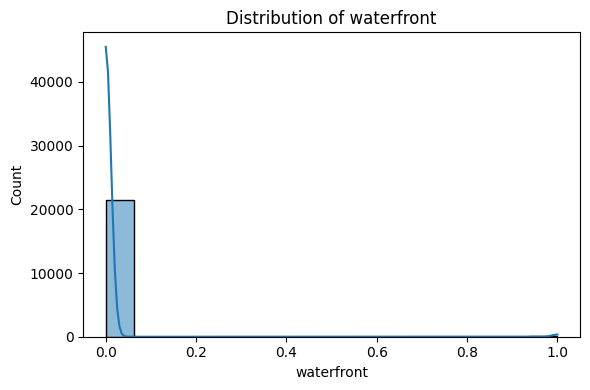

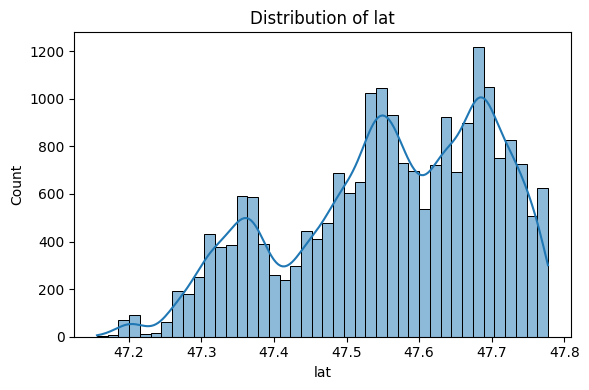

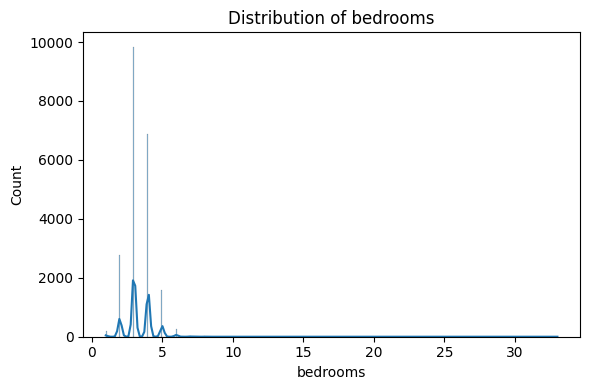

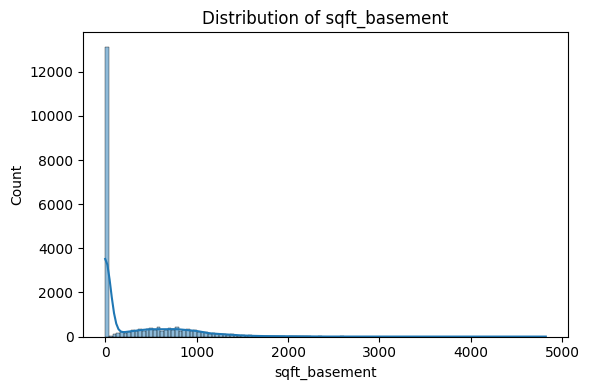

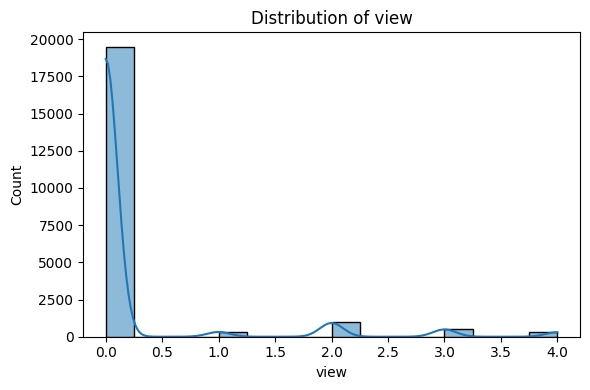

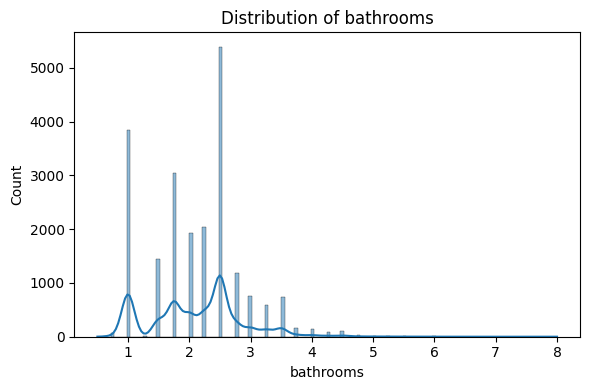

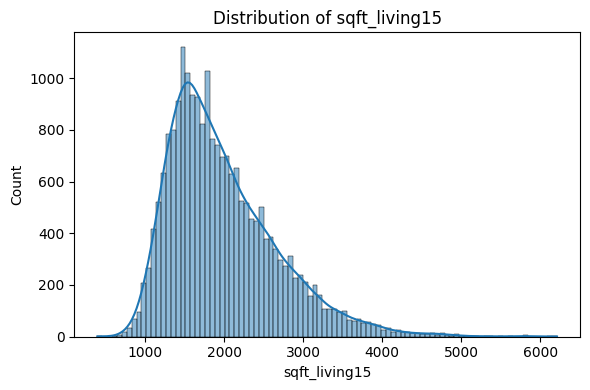

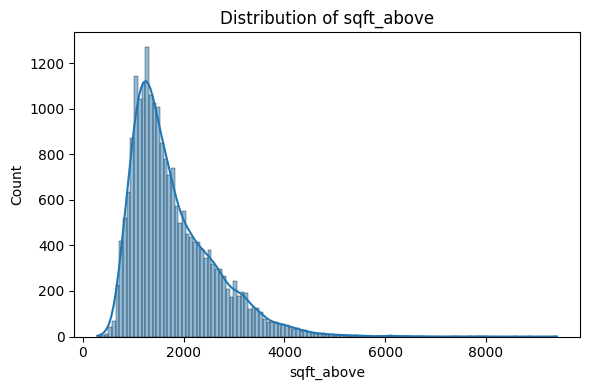

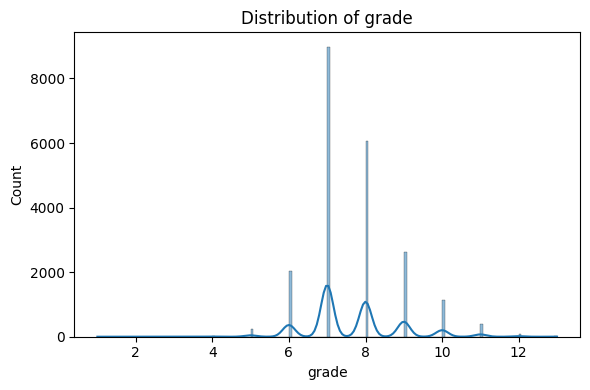

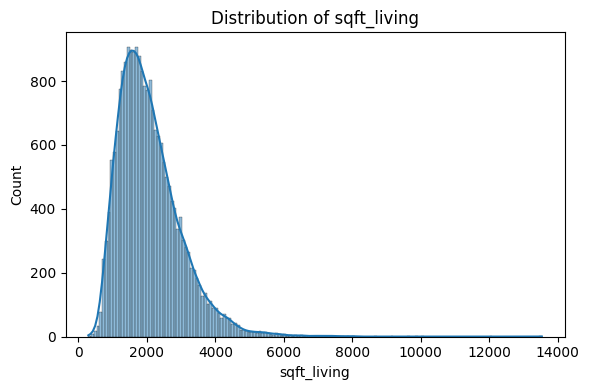

In [142]:
features =  ["price", "floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
for feature in features:
    plt.figure(figsize = (6,4))
    sns.histplot(df[feature], kde = True)
    plt.title(f"Distribution of {feature}")
    plt.tight_layout()
    plt.show()

In [85]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.corr()["price"].sort_values(ascending = False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525649
view             0.397293
sqft_basement    0.323816
bedrooms         0.308868
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

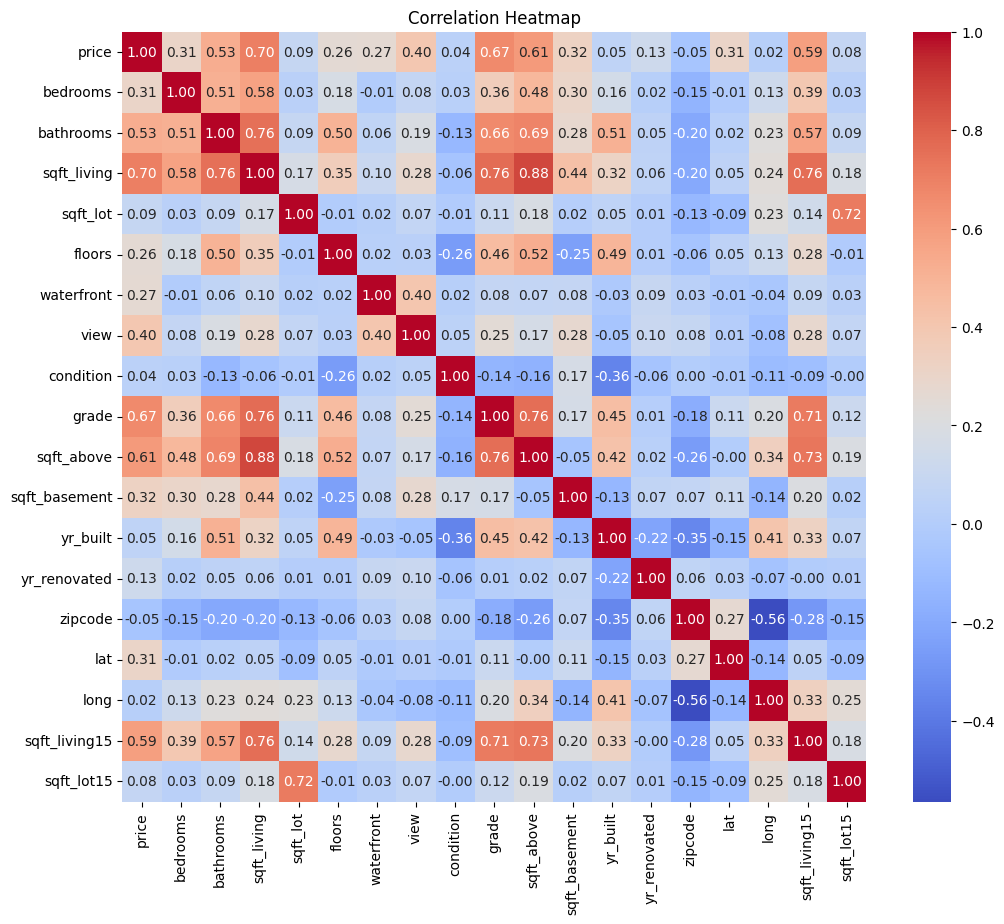

In [91]:
hm = df_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(hm, annot = True, cmap = "coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Model Development

In [108]:
X = df[["sqft_living"]]
y = df[["price"]]
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
r_square = lr.score(X,y)
print(f"Using only sqft_living, we achieve an R² of {r_square:.4f}, meaning about {(100 * r_square):.2f}% of price variation is explained by living area alone.")


Using only sqft_living, we achieve an R² of 0.4929, meaning about 49.29% of price variation is explained by living area alone.


In [122]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
z = df[features]
y = df[["price"]]
z = z.astype("float")

In [128]:
X_train, X_test, y_train, y_test = train_test_split(z, y, test_size = 0.2, random_state = 1)
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [130]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² score with polynomial features: {r2:.2f}")
print(f"RMSE with polynomial features: ${rmse:,.0f}")

R² score with polynomial features: 0.65
RMSE with polynomial features: $247,208


Linear Regression -> R² score: 0.65
Linear Regression -> RMSE: $247,208
Polynomial Regression -> R² score: 0.76
Polynomial Regression -> RMSE: $202,151


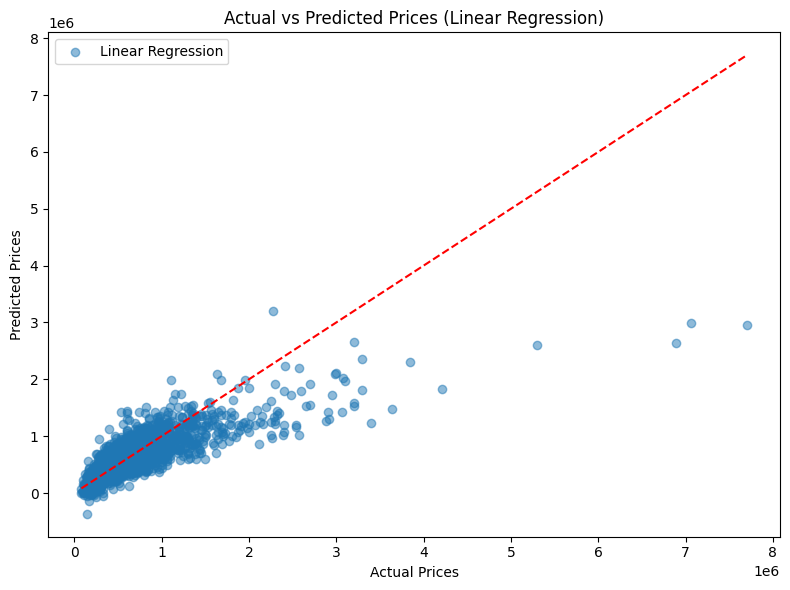

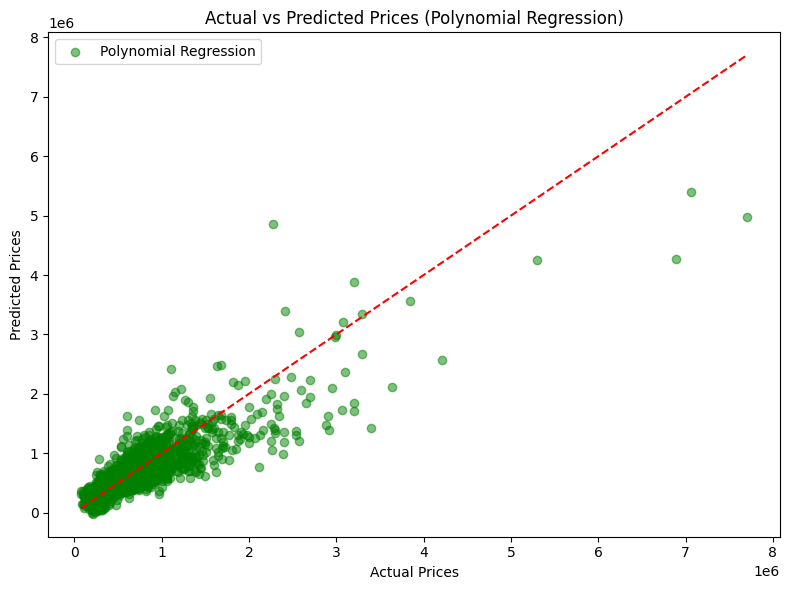

In [134]:
# Define selected strong features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

X = df[features]
y = df["price"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# ---------------------------------------
#  Linear Regression Pipeline
# ---------------------------------------
linear_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('model', LinearRegression())
])

# Train
linear_pipeline.fit(X_train, y_train)

# Predict
y_pred_linear = linear_pipeline.predict(X_test)

# Evaluate
r2_linear = r2_score(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

print(f"Linear Regression -> R² score: {r2_linear:.2f}")
print(f"Linear Regression -> RMSE: ${rmse_linear:,.0f}")

# ---------------------------------------
#  Polynomial Regression Pipeline (degree 2 on all features)
# ---------------------------------------
poly_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
])

# Train
poly_pipeline.fit(X_train, y_train)

# Predict
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate
r2_poly = r2_score(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))

print(f"Polynomial Regression -> R² score: {r2_poly:.2f}")
print(f"Polynomial Regression -> RMSE: ${rmse_poly:,.0f}")

# ---------------------------------------
#  Plot Actual vs Predicted (Linear)
# ---------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------------------------
#  Plot Actual vs Predicted (Polynomial)
# ---------------------------------------
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='green', label='Polynomial Regression')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.legend()
plt.tight_layout()
plt.show()


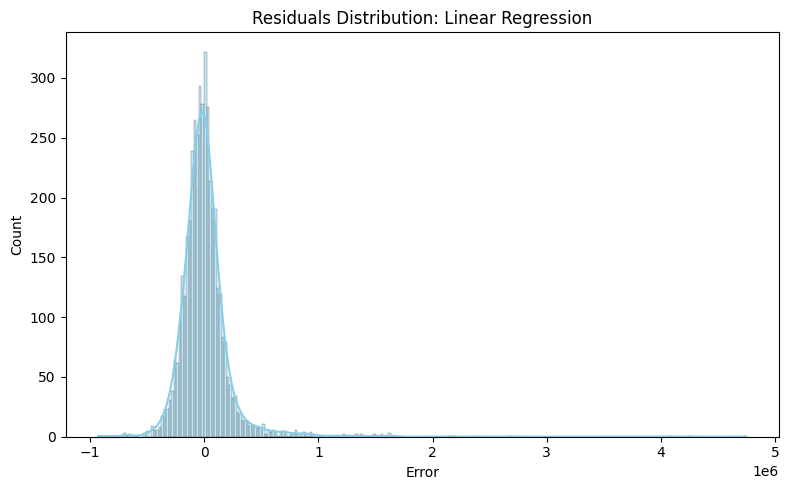

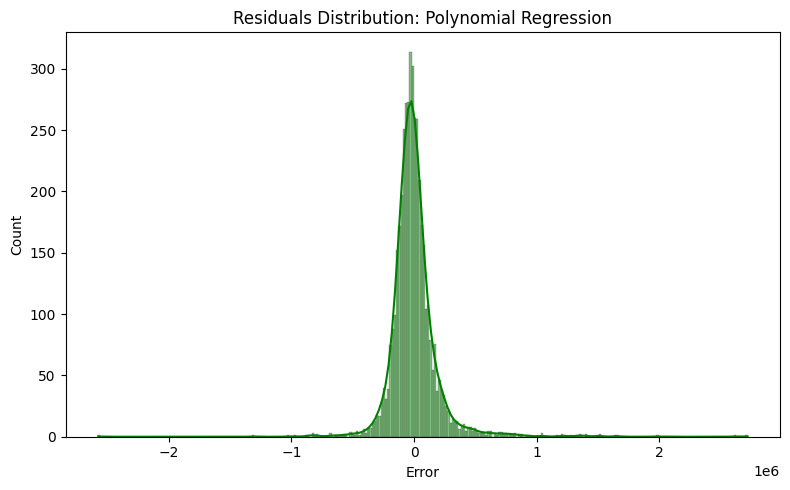

In [148]:
# Residuals: Linear
residuals_linear = y_test - y_pred_linear
plt.figure(figsize=(8, 5))
sns.histplot(residuals_linear, kde=True, color="skyblue")
plt.title("Residuals Distribution: Linear Regression")
plt.xlabel("Error")
plt.tight_layout()
plt.show()

# Residuals: Polynomial
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(8, 5))
sns.histplot(residuals_poly, kde=True, color="green")
plt.title("Residuals Distribution: Polynomial Regression")
plt.xlabel("Error")
plt.tight_layout()
plt.show()

## Model Evaluation Summary

### Linear Regression
- **R² score:** 0.65
- **RMSE:** ~$247,000

### Polynomial Regression (degree 2)
- **R² score:** 0.76
- **RMSE:** ~$202,000

### Business Recommendation
While polynomial regression offers higher accuracy in this case, it introduces interpretability challenges. Depending on the business context, either model may be chosen. In this project, we demonstrated both approaches to showcase trade-offs between accuracy and simplicity.


#  References

1. **Dataset Source**  
   - House Sales in King County, USA: [Kaggle Dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)  
   - Contains house sale prices for King County (Seattle area) between May 2014 and May 2015.

3. **Learning & Methodology References**  
   - IBM Data Science Professional Certificate: [IBM on Coursera](https://www.coursera.org/professional-certificates/ibm-data-science)
    
---

✅ This project demonstrates end-to-end data science workflow including data preprocessing, exploratory analysis, feature engineering, model training, evaluation, and business interpretation. All code and analysis are implemented in Python using open-source libraries.
